In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold, cross_val_score

In [42]:
df = pd.read_csv('./bank-additional-full.csv', sep=';')
yes_df = df.loc[df['y'] == 'yes']
del yes_df['duration']
print(yes_df.shape)
yes_df.head()

(4640, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [43]:
y_col = yes_df['y']
del yes_df['y']
df_dummies = pd.get_dummies(yes_df)
print(df_dummies.shape)

(4640, 61)


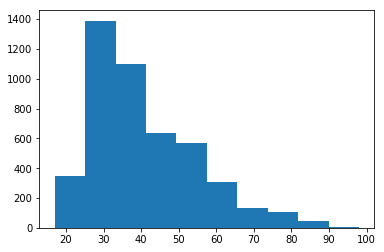

In [44]:
plt.hist(yes_df["age"])
plt.show()

In [45]:
clf = ExtraTreesClassifier(n_estimators=100)
k_fold = KFold(n_splits=10)

In [47]:
score = cross_val_score(clf, df_dummies, y_col, cv=k_fold, n_jobs=-1)
print('Average accuracy: {} %'.format(np.mean(score)*100))

Average accuracy: 100.0 %


In [48]:
clf.fit(df_dummies, y_col)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
print(df_dummies.shape)
for f in range(df_dummies.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
(4640, 61)
1. feature 60 (0.000000)
2. feature 29 (0.000000)
3. feature 27 (0.000000)
4. feature 26 (0.000000)
5. feature 25 (0.000000)
6. feature 24 (0.000000)
7. feature 23 (0.000000)
8. feature 22 (0.000000)
9. feature 21 (0.000000)
10. feature 20 (0.000000)
11. feature 19 (0.000000)
12. feature 18 (0.000000)
13. feature 17 (0.000000)
14. feature 16 (0.000000)
15. feature 15 (0.000000)
16. feature 14 (0.000000)
17. feature 13 (0.000000)
18. feature 12 (0.000000)
19. feature 11 (0.000000)
20. feature 10 (0.000000)
21. feature 9 (0.000000)
22. feature 8 (0.000000)
23. feature 7 (0.000000)
24. feature 6 (0.000000)
25. feature 5 (0.000000)
26. feature 4 (0.000000)
27. feature 3 (0.000000)
28. feature 2 (0.000000)
29. feature 1 (0.000000)
30. feature 28 (0.000000)
31. feature 30 (0.000000)
32. feature 59 (0.000000)
33. feature 31 (0.000000)
34. feature 58 (0.000000)
35. feature 57 (0.000000)
36. feature 56 (0.000000)
37. feature 55 (0.000000)
38. feature 54 (0.000000)
39